In [65]:
import pandas as pd
import numpy as np

In [66]:
df = pd.read_csv("concatenated_data.csv",parse_dates=['Posting Date'])
df.head()

C:\Users\surit\AppData\Local\Temp\ipykernel_24196\1461912451.py:1: DtypeWarning: Columns (12,19,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("concatenated_data.csv",parse_dates=['Posting Date'])


,Control1000000015,Posting Date,Projects Code,Item No.,Document No.,Issue Note No.,Item Description,Quantity,Resource No.,Resource FA No.,Resource Reg. No.,Description 2,Subcontractor,Carcass No.,Referred Item,Unit of Measure,Cost Amount (Actual),Location Code,Applied Entry to Adjust,Description,Completely Invoiced,Cost Amount (Actual) (ACY),Control1000000014,Cost Amount (Expected),Cost Amount (Expected) (ACY),Cost Amount (Non-Invtbl.),Cost Amount (Non-Invtbl.)(ACY),Document Line No.,Document Type,Entry Type,Expiration Date,Invoiced Quantity,Lot No.,Maintenance Order No.,Maintenance Order Type,Open,Order Line No.,Order No.,Order Type,Prod. Order Comp. Line No.,Project Task No.,Qty. per Unit of Measure,Remaining Quantity,Reserved Quantity,Return Reason Code,Sales Amount (Actual),Sales Amount (Expected),Sbu Code,Serial No.,Shipped Qty. Not Returned,Variant Code,Vendor No.,Entry No.,Gen. Prod. Posting Group,PO Ref. No.,Sub. Project,Positive,Project No.,Vendor Name
0,GOODS IN TRANSIT,2019-04-01,4-01200,70470,207994,NaN,DIESEL,-174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LTRS,-18574.5,4-01200,False,NaN,True,0,2-00060,0.0,0,0,0,10000,Transfer Shipment,Transfer,NaN,-174.0,NaN,NaN,NaN,False,10000,101882,Transfer,0,NaN,1.0,0.0,0,NaN,0,0,2.0 ROADS,NaN,0.0,NaN,NaN,3262413,FUEL,NaN,NaN,False,NaN,NaN
1,GOODS IN TRANSIT,2019-04-01,4-01200,70470,207994,NaN,DIESEL,174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LTRS,18574.5,IN - TRANS,False,NaN,True,0,2-00060,0.0,0,0,0,10000,Transfer Shipment,Transfer,NaN,174.0,NaN,NaN,NaN,False,10000,101882,Transfer,0,NaN,1.0,0.0,0,NaN,0,0,2.0 ROADS,NaN,0.0,NaN,NaN,3262414,FUEL,NaN,NaN,True,NaN,NaN
2,GOODS IN TRANSIT,2019-04-01,6-00600,70470,207995,NaN,DIESEL,-30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LTRS,-3075.0,6-00600,False,NaN,True,0,2-00060,0.0,0,0,0,10000,Transfer Shipment,Transfer,NaN,-30.0,NaN,NaN,NaN,False,10000,101881,Transfer,0,NaN,1.0,0.0,0,NaN,0,0,5.0 HEAD OFFICE,NaN,0.0,NaN,NaN,3262416,FUEL,NaN,NaN,False,NaN,NaN
3,GOODS IN TRANSIT,2019-04-01,6-00600,70470,207995,NaN,DIESEL,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LTRS,3075.0,IN - TRANS,False,NaN,True,0,2-00060,0.0,0,0,0,10000,Transfer Shipment,Transfer,NaN,30.0,NaN,NaN,NaN,False,10000,101881,Transfer,0,NaN,1.0,0.0,0,NaN,0,0,5.0 HEAD OFFICE,NaN,0.0,NaN,NaN,3262417,FUEL,NaN,NaN,True,NaN,NaN
4,GOODS IN TRANSIT,2019-04-01,6-00600,70470,207996,NaN,DIESEL,-30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LTRS,-3075.0,6-00600,False,NaN,True,0,2-00060,0.0,0,0,0,10000,Transfer Shipment,Transfer,NaN,-30.0,NaN,NaN,NaN,False,10000,101885,Transfer,0,NaN,1.0,0.0,0,NaN,0,0,5.0 HEAD OFFICE,NaN,0.0,NaN,NaN,3262449,FUEL,NaN,NaN,False,NaN,NaN


In [67]:
df.columns

Index(['Control1000000015', 'Posting Date', 'Projects Code', 'Item No.',
       'Document No.', 'Issue Note No.', 'Item Description', 'Quantity',
       'Resource No.', 'Resource FA No.', 'Resource Reg. No.', 'Description 2',
       'Subcontractor', 'Carcass No.', 'Referred Item', 'Unit of Measure',
       'Cost Amount (Actual)', 'Location Code', 'Applied Entry to Adjust',
       'Description', 'Completely Invoiced', 'Cost Amount (Actual) (ACY)',
       'Control1000000014', 'Cost Amount (Expected)',
       'Cost Amount (Expected) (ACY)', 'Cost Amount (Non-Invtbl.)',
       'Cost Amount (Non-Invtbl.)(ACY)', 'Document Line No.', 'Document Type',
       'Entry Type', 'Expiration Date', 'Invoiced Quantity', 'Lot No.',
       'Maintenance Order No.', 'Maintenance Order Type', 'Open',
       'Order Line No.', 'Order No.', 'Order Type',
       'Prod. Order Comp. Line No.', 'Project Task No.',
       'Qty. per Unit of Measure', 'Remaining Quantity', 'Reserved Quantity',
       'Return Reason C

In [68]:
df[['Posting Date','Quantity']]

,Posting Date,Quantity
0,2019-04-01,-174.0
1,2019-04-01,174.0
2,2019-04-01,-30.0
3,2019-04-01,30.0
4,2019-04-01,-30.0
...,...,...
123057,2022-03-31,-60.0
123058,2022-03-31,-280.0
123059,2022-03-31,-1300.0
123060,2022-03-30,-190.0


In [69]:
df.dtypes

Control1000000015                         object
Posting Date                      datetime64[ns]
Projects Code                             object
Item No.                                   int64
Document No.                              object
Issue Note No.                            object
Item Description                          object
Quantity                                 float64
Resource No.                              object
Resource FA No.                           object
Resource Reg. No.                         object
Description 2                             object
Subcontractor                             object
Carcass No.                              float64
Referred Item                            float64
Unit of Measure                           object
Cost Amount (Actual)                     float64
Location Code                             object
Applied Entry to Adjust                     bool
Description                               object
Completely Invoiced 

In [70]:
df.isnull().sum()

Control1000000015                      0
Posting Date                           0
Projects Code                          0
Item No.                               0
Document No.                           0
Issue Note No.                     43057
Item Description                       0
Quantity                               0
Resource No.                       68031
Resource FA No.                    71362
Resource Reg. No.                  98466
Description 2                      86768
Subcontractor                     121700
Carcass No.                       123062
Referred Item                     123036
Unit of Measure                       18
Cost Amount (Actual)                   0
Location Code                          0
Applied Entry to Adjust                0
Description                       123052
Completely Invoiced                    0
Cost Amount (Actual) (ACY)             0
Control1000000014                      0
Cost Amount (Expected)                 0
Cost Amount (Exp

In [71]:
# Remove columns that have any null values
df = df.dropna(axis=1)

In [72]:
df.isnull().sum()

Control1000000015                 0
Posting Date                      0
Projects Code                     0
Item No.                          0
Document No.                      0
Item Description                  0
Quantity                          0
Cost Amount (Actual)              0
Location Code                     0
Applied Entry to Adjust           0
Completely Invoiced               0
Cost Amount (Actual) (ACY)        0
Control1000000014                 0
Cost Amount (Expected)            0
Cost Amount (Expected) (ACY)      0
Cost Amount (Non-Invtbl.)         0
Cost Amount (Non-Invtbl.)(ACY)    0
Document Line No.                 0
Entry Type                        0
Invoiced Quantity                 0
Open                              0
Order Line No.                    0
Prod. Order Comp. Line No.        0
Qty. per Unit of Measure          0
Remaining Quantity                0
Reserved Quantity                 0
Sales Amount (Actual)             0
Sales Amount (Expected)     

In [73]:
df

,Control1000000015,Posting Date,Projects Code,Item No.,Document No.,Item Description,Quantity,Cost Amount (Actual),Location Code,Applied Entry to Adjust,Completely Invoiced,Cost Amount (Actual) (ACY),Control1000000014,Cost Amount (Expected),Cost Amount (Expected) (ACY),Cost Amount (Non-Invtbl.),Cost Amount (Non-Invtbl.)(ACY),Document Line No.,Entry Type,Invoiced Quantity,Open,Order Line No.,Prod. Order Comp. Line No.,Qty. per Unit of Measure,Remaining Quantity,Reserved Quantity,Sales Amount (Actual),Sales Amount (Expected),Sbu Code,Shipped Qty. Not Returned,Entry No.,Gen. Prod. Posting Group,Positive
0,GOODS IN TRANSIT,2019-04-01,4-01200,70470,207994,DIESEL,-174.0,-18574.50,4-01200,False,True,0,2-00060,0.0,0,0,0,10000,Transfer,-174.0,False,10000,0,1.0,0.0,0,0,0,2.0 ROADS,0.0,3262413,FUEL,False
1,GOODS IN TRANSIT,2019-04-01,4-01200,70470,207994,DIESEL,174.0,18574.50,IN - TRANS,False,True,0,2-00060,0.0,0,0,0,10000,Transfer,174.0,False,10000,0,1.0,0.0,0,0,0,2.0 ROADS,0.0,3262414,FUEL,True
2,GOODS IN TRANSIT,2019-04-01,6-00600,70470,207995,DIESEL,-30.0,-3075.00,6-00600,False,True,0,2-00060,0.0,0,0,0,10000,Transfer,-30.0,False,10000,0,1.0,0.0,0,0,0,5.0 HEAD OFFICE,0.0,3262416,FUEL,False
3,GOODS IN TRANSIT,2019-04-01,6-00600,70470,207995,DIESEL,30.0,3075.00,IN - TRANS,False,True,0,2-00060,0.0,0,0,0,10000,Transfer,30.0,False,10000,0,1.0,0.0,0,0,0,5.0 HEAD OFFICE,0.0,3262417,FUEL,True
4,GOODS IN TRANSIT,2019-04-01,6-00600,70470,207996,DIESEL,-30.0,-3075.00,6-00600,False,True,0,2-00060,0.0,0,0,0,10000,Transfer,-30.0,False,10000,0,1.0,0.0,0,0,0,5.0 HEAD OFFICE,0.0,3262449,FUEL,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123057,ELECTRICAL MATERIAL,2022-03-31,3-04300,70470,IJNL/ONKA/0001554,DIESEL,-60.0,-7230.00,3-04300,False,True,0,7-00190,0.0,0,0,0,0,Negative Adjmt.,-60.0,False,0,0,1.0,0.0,0,0,0,1.0 BUILDING,-60.0,6225295,FUEL,False
123058,BUILDING FURNITURE,2022-03-31,5-00300,70470,IJNL/GDC/0000076,DIESEL,-280.0,-33740.00,5-00300,False,True,0,7-00380,0.0,0,0,0,0,Negative Adjmt.,-280.0,False,0,0,1.0,0.0,0,0,0,8.0 DEVELOPMENTS,-280.0,6226329,FUEL,False
123059,FUEL -SITE,2022-03-31,5-00311,70470,IJNL/GDC/0000080,DIESEL,-1300.0,-217225.18,5-00311,False,True,0,7-30010,0.0,0,0,0,0,Negative Adjmt.,-1300.0,False,0,0,1.0,0.0,0,0,0,8.0 DEVELOPMENTS,-1300.0,6226436,FUEL,False
123060,STOCK CONTROL ACCOUNT,2022-03-30,8-01200,70470,300139,DIESEL,-190.0,-33345.00,IN - TRANS,False,True,0,2-00020,0.0,0,0,0,10000,Transfer,-190.0,False,10000,0,1.0,0.0,0,0,0,3.4 CRUSHER,0.0,6228719,FUEL,False


In [74]:
from sklearn.preprocessing import LabelEncoder

def encode_object_bool_features(df):
    df = df.copy()  # make a copy of the dataframe
    le = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == object:
            df.loc[:, column] = le.fit_transform(df.loc[:, column])  # use .loc accessor to modify the original dataframe
        elif df[column].dtype == bool:
            df.loc[:, column] = df.loc[:, column].map({False: 0, True: 1})  # use .loc accessor to modify the original dataframe
    return df


In [75]:
df = encode_object_bool_features(df)

C:\Users\surit\AppData\Local\Temp\ipykernel_24196\1504834376.py:8: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, column] = le.fit_transform(df.loc[:, column])  # use .loc accessor to modify the original dataframe
C:\Users\surit\AppData\Local\Temp\ipykernel_24196\1504834376.py:8: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, column] = le.fit_transform(df.loc[:, column])  # use .loc accessor to modify the original dataframe
C:\Users\surit\AppData\Local\Temp\ipykernel_24196\1504834376.py:8: FutureWarning: In a future version, `df.ilo

In [76]:
df.columns

Index(['Control1000000015', 'Posting Date', 'Projects Code', 'Item No.',
       'Document No.', 'Item Description', 'Quantity', 'Cost Amount (Actual)',
       'Location Code', 'Applied Entry to Adjust', 'Completely Invoiced',
       'Cost Amount (Actual) (ACY)', 'Control1000000014',
       'Cost Amount (Expected)', 'Cost Amount (Expected) (ACY)',
       'Cost Amount (Non-Invtbl.)', 'Cost Amount (Non-Invtbl.)(ACY)',
       'Document Line No.', 'Entry Type', 'Invoiced Quantity', 'Open',
       'Order Line No.', 'Prod. Order Comp. Line No.',
       'Qty. per Unit of Measure', 'Remaining Quantity', 'Reserved Quantity',
       'Sales Amount (Actual)', 'Sales Amount (Expected)', 'Sbu Code',
       'Shipped Qty. Not Returned', 'Entry No.', 'Gen. Prod. Posting Group',
       'Positive'],
      dtype='object')

In [77]:
df.set_index('Posting Date', inplace=True)

In [78]:
df.head()

,Control1000000015,Projects Code,Item No.,Document No.,Item Description,Quantity,Cost Amount (Actual),Location Code,Applied Entry to Adjust,Completely Invoiced,Cost Amount (Actual) (ACY),Control1000000014,Cost Amount (Expected),Cost Amount (Expected) (ACY),Cost Amount (Non-Invtbl.),Cost Amount (Non-Invtbl.)(ACY),Document Line No.,Entry Type,Invoiced Quantity,Open,Order Line No.,Prod. Order Comp. Line No.,Qty. per Unit of Measure,Remaining Quantity,Reserved Quantity,Sales Amount (Actual),Sales Amount (Expected),Sbu Code,Shipped Qty. Not Returned,Entry No.,Gen. Prod. Posting Group,Positive
Posting Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-01,12,46,70470,63,1,-174.0,-18574.5,46,0,1,0,4,0.0,0,0,0,10000,4,-174.0,0,10000,0,1.0,0.0,0,0,0,1,0.0,3262413,1,0
2019-04-01,12,46,70470,63,1,174.0,18574.5,84,0,1,0,4,0.0,0,0,0,10000,4,174.0,0,10000,0,1.0,0.0,0,0,0,1,0.0,3262414,1,1
2019-04-01,12,67,70470,64,1,-30.0,-3075.0,65,0,1,0,4,0.0,0,0,0,10000,4,-30.0,0,10000,0,1.0,0.0,0,0,0,12,0.0,3262416,1,0
2019-04-01,12,67,70470,64,1,30.0,3075.0,84,0,1,0,4,0.0,0,0,0,10000,4,30.0,0,10000,0,1.0,0.0,0,0,0,12,0.0,3262417,1,1
2019-04-01,12,67,70470,65,1,-30.0,-3075.0,65,0,1,0,4,0.0,0,0,0,10000,4,-30.0,0,10000,0,1.0,0.0,0,0,0,12,0.0,3262449,1,0


In [79]:
df.loc[:,'QuantityAbs'] = df['Quantity'].abs()

In [80]:
df.drop(columns=['Quantity'],inplace=True)

In [81]:
df.head()

,Control1000000015,Projects Code,Item No.,Document No.,Item Description,Cost Amount (Actual),Location Code,Applied Entry to Adjust,Completely Invoiced,Cost Amount (Actual) (ACY),Control1000000014,Cost Amount (Expected),Cost Amount (Expected) (ACY),Cost Amount (Non-Invtbl.),Cost Amount (Non-Invtbl.)(ACY),Document Line No.,Entry Type,Invoiced Quantity,Open,Order Line No.,Prod. Order Comp. Line No.,Qty. per Unit of Measure,Remaining Quantity,Reserved Quantity,Sales Amount (Actual),Sales Amount (Expected),Sbu Code,Shipped Qty. Not Returned,Entry No.,Gen. Prod. Posting Group,Positive,QuantityAbs
Posting Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-01,12,46,70470,63,1,-18574.5,46,0,1,0,4,0.0,0,0,0,10000,4,-174.0,0,10000,0,1.0,0.0,0,0,0,1,0.0,3262413,1,0,174.0
2019-04-01,12,46,70470,63,1,18574.5,84,0,1,0,4,0.0,0,0,0,10000,4,174.0,0,10000,0,1.0,0.0,0,0,0,1,0.0,3262414,1,1,174.0
2019-04-01,12,67,70470,64,1,-3075.0,65,0,1,0,4,0.0,0,0,0,10000,4,-30.0,0,10000,0,1.0,0.0,0,0,0,12,0.0,3262416,1,0,30.0
2019-04-01,12,67,70470,64,1,3075.0,84,0,1,0,4,0.0,0,0,0,10000,4,30.0,0,10000,0,1.0,0.0,0,0,0,12,0.0,3262417,1,1,30.0
2019-04-01,12,67,70470,65,1,-3075.0,65,0,1,0,4,0.0,0,0,0,10000,4,-30.0,0,10000,0,1.0,0.0,0,0,0,12,0.0,3262449,1,0,30.0


In [82]:
df.describe()

,Control1000000015,Projects Code,Item No.,Document No.,Item Description,Cost Amount (Actual),Location Code,Applied Entry to Adjust,Completely Invoiced,Cost Amount (Actual) (ACY),Control1000000014,Cost Amount (Expected),Cost Amount (Expected) (ACY),Cost Amount (Non-Invtbl.),Cost Amount (Non-Invtbl.)(ACY),Document Line No.,Entry Type,Invoiced Quantity,Open,Order Line No.,Prod. Order Comp. Line No.,Qty. per Unit of Measure,Remaining Quantity,Reserved Quantity,Sales Amount (Actual),Sales Amount (Expected),Sbu Code,Shipped Qty. Not Returned,Entry No.,Gen. Prod. Posting Group,Positive,QuantityAbs
count,123062.000000,123062.000000,123062.000000,123062.000000,123062.000000,1.230620e+05,123062.000000,123062.0,123062.000000,123062.0,123062.000000,123062.000000,123062.0,123062.0,123062.0,123062.000000,123062.000000,123062.000000,123062.000000,123062.000000,123062.000000,123062.000000,123062.000000,123062.0,123062.0,123062.0,123062.000000,123062.000000,1.230620e+05,123062.000000,123062.000000,123062.000000
mean,15.148462,57.909151,70495.524630,21115.020656,1.039850,-2.647330e+01,68.036664,0.0,0.999837,0.0,18.497310,2.114715,0.0,0.0,0.0,3943.703174,2.013359,-0.391379,0.000098,4014.561766,252.433733,0.998953,0.007323,0.0,0.0,0.0,3.967366,-74.968808,4.737893e+06,1.039850,0.185467,262.991622
std,7.529177,18.395045,124.915608,10331.493534,0.197303,2.428523e+05,23.639226,0.0,0.012747,0.0,12.459345,226.204780,0.0,0.0,0.0,7204.321162,1.418179,1241.134683,0.009874,7268.275764,3459.819248,0.032321,1.067537,0.0,0.0,0.0,3.884435,320.400920,8.604039e+05,0.197303,0.388678,1212.953014
min,0.000000,0.000000,70470.000000,0.000000,0.000000,-1.237500e+07,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,-41973.000000,0.000000,0.000000,0.000000,0.001000,0.000000,0.0,0.0,0.0,0.000000,-41973.000000,3.262413e+06,0.000000,0.000000,0.000050
25%,11.000000,44.000000,70470.000000,13331.000000,1.000000,-1.105000e+04,46.000000,0.0,1.000000,0.0,4.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,-100.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,-88.000000,3.990481e+06,1.000000,0.000000,30.000000
50%,11.000000,67.000000,70470.000000,21752.000000,1.000000,-5.278500e+03,79.000000,0.0,1.000000,0.0,28.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,-45.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,2.000000,-25.000000,4.733472e+06,1.000000,0.000000,68.000000
75%,12.000000,72.000000,70470.000000,30790.750000,1.000000,-1.387750e+03,84.000000,0.0,1.000000,0.0,28.000000,0.000000,0.0,0.0,0.0,10000.000000,4.000000,-8.000000,0.000000,10000.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,8.000000,0.000000,5.505460e+06,1.000000,0.000000,125.000000
max,40.000000,90.000000,71822.000000,37462.000000,2.000000,1.125000e+07,110.000000,0.0,1.000000,0.0,40.000000,33566.830000,0.0,0.0,0.0,290000.000000,4.000000,40000.000000,1.000000,290000.000000,130000.000000,1.000000,270.000000,0.0,0.0,0.0,15.000000,0.000000,6.228720e+06,2.000000,1.000000,41973.000000


In [95]:
df[['QuantityAbs']]

,QuantityAbs
Posting Date,
2019-04-01,174.0
2019-04-01,174.0
2019-04-01,30.0
2019-04-01,30.0
2019-04-01,30.0
...,...
2022-03-31,60.0
2022-03-31,280.0
2022-03-31,1300.0


In [96]:
# Resample data to monthly frequency and select the last value for each month
monthly_data = df['QuantityAbs'].resample('M').last()

In [101]:
# Save the monthly data to a CSV file
monthly_data.to_csv('monthly_data.csv')

In [103]:
train = df.loc[df.index < '2021-12-31']
test = df.loc[df.index >= '2021-12-31']

X_train = train.drop(columns='QuantityAbs')
y_train = train[['QuantityAbs']]

X_test = test.drop(columns='QuantityAbs')
y_test = test['QuantityAbs']

In [84]:
X_test

,Control1000000015,Projects Code,Item No.,Document No.,Item Description,Cost Amount (Actual),Location Code,Applied Entry to Adjust,Completely Invoiced,Cost Amount (Actual) (ACY),Control1000000014,Cost Amount (Expected),Cost Amount (Expected) (ACY),Cost Amount (Non-Invtbl.),Cost Amount (Non-Invtbl.)(ACY),Document Line No.,Entry Type,Invoiced Quantity,Open,Order Line No.,Prod. Order Comp. Line No.,Qty. per Unit of Measure,Remaining Quantity,Reserved Quantity,Sales Amount (Actual),Sales Amount (Expected),Sbu Code,Shipped Qty. Not Returned,Entry No.,Gen. Prod. Posting Group,Positive
Posting Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-03,11,67,70470,15645,1,0.00,65,0,1,0,28,0.0,0,0,0,10000,4,-110.0,0,10000,0,1.0,0.0,0,0,0,12,0.0,5902964,1,0
2022-01-03,11,67,70470,15645,1,0.00,84,0,1,0,28,0.0,0,0,0,10000,4,110.0,0,10000,0,1.0,0.0,0,0,0,12,0.0,5902965,1,1
2022-01-03,11,67,70470,15648,1,0.00,65,0,1,0,28,0.0,0,0,0,10000,4,-110.0,0,10000,0,1.0,0.0,0,0,0,12,0.0,5903340,1,0
2022-01-03,11,67,70470,15648,1,0.00,84,0,1,0,28,0.0,0,0,0,10000,4,110.0,0,10000,0,1.0,0.0,0,0,0,12,0.0,5903341,1,1
2022-01-03,12,75,70470,15649,1,-10497.50,92,0,1,0,4,0.0,0,0,0,10000,4,-95.0,0,10000,0,1.0,0.0,0,0,0,9,0.0,5903377,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,8,29,70470,31216,1,-7230.00,29,0,1,0,13,0.0,0,0,0,0,1,-60.0,0,0,0,1.0,0.0,0,0,0,0,-60.0,6225295,1,0
2022-03-31,3,61,70470,26532,1,-33740.00,61,0,1,0,26,0.0,0,0,0,0,1,-280.0,0,0,0,1.0,0.0,0,0,0,14,-280.0,6226329,1,0
2022-03-31,11,62,70470,26533,1,-217225.18,62,0,1,0,28,0.0,0,0,0,0,1,-1300.0,0,0,0,1.0,0.0,0,0,0,14,-1300.0,6226436,1,0


In [85]:
y_train.max()

QuantityAbs    41973.0
dtype: float64

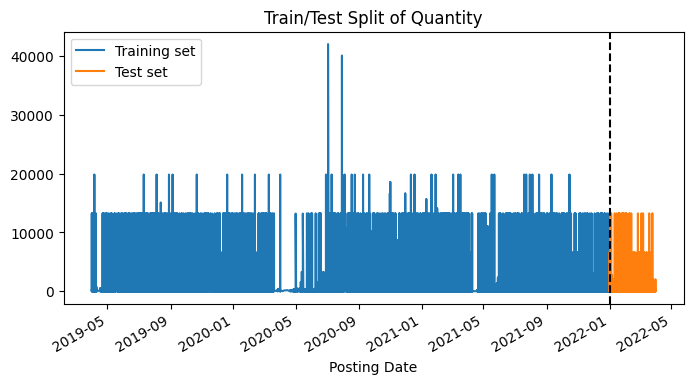

In [86]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(8,4))
train['QuantityAbs'].plot(ax=ax, label='Training set')
test['QuantityAbs'].plot(ax=ax, label='Test set')
ax.legend()
plt.title("Train/Test Split of Quantity")
ax.axvline('2022-01-01', color='black', ls='--')
plt.show()

In [87]:
# Define a function to calculate accuracy metrics
def calculate_accuracy(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    rmse = np.sqrt(np.mean(np.square(y_true - y_pred)))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

In [88]:
from xgboost import XGBRegressor
reg = XGBRegressor(n_estimators=100, learning_rate = 0.1)
reg.fit(X_train,y_train)
predictions = reg.predict(X_test) 

from sklearn.metrics import mean_absolute_error
print("Accuracy of the train set: {:.3f}".format(reg.score(X_train,y_train)))
print("Accuracy of the test set: {:.3f}".format(reg.score(X_test,y_test)))
print("MSE of the test set: {:.3f}".format(mean_absolute_error(y_test,predictions)))

Accuracy of the train set: 1.000
Accuracy of the test set: 0.990
MSE of the test set: 4.232


Simple Moving Average (SMA)

C:\Users\surit\AppData\Local\Temp\ipykernel_24196\775426701.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_forecast = df.append(forecast)


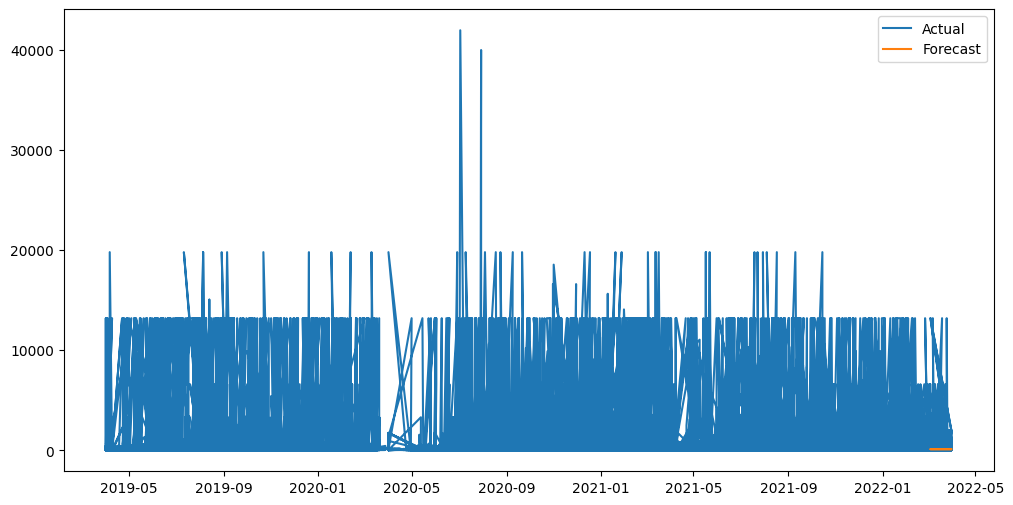

In [89]:
window_size = 365
sma = df['QuantityAbs'].rolling(window=window_size).mean()

last_values = df['QuantityAbs'][-window_size:]
forecast = pd.DataFrame(last_values, columns=['QuantityAbs'], index=last_values.index)
forecast['SMA'] = forecast['QuantityAbs'].rolling(window=window_size).mean()
forecast['Forecast'] = forecast['SMA'].iloc[-1]

df_forecast = df.append(forecast)

plt.figure(figsize=(12,6))
plt.plot(df_forecast['QuantityAbs'], label='Actual')
plt.plot(df_forecast['Forecast'], label='Forecast')
plt.legend()
plt.show()

Exponential Smoothing (SES)

c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_pred

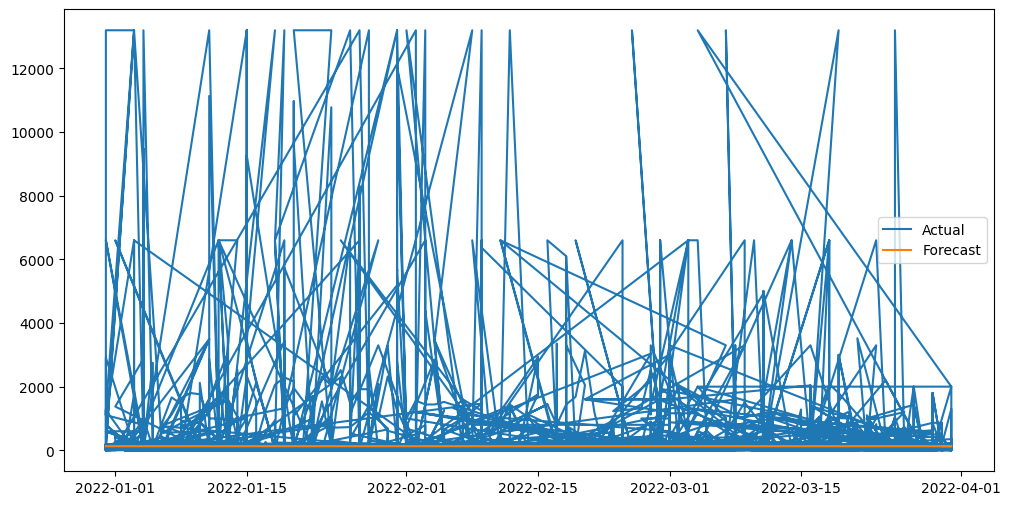

MSE: 966157.3487307108
MAE: 241.2029100945844
R-squared: -0.013047366459340237
None


In [115]:
from statsmodels.tsa.api import SimpleExpSmoothing

# Fit SES to the training set
model = SimpleExpSmoothing(y_train).fit()

# Generate forecasts for the testing set
y_pred = model.forecast(len(y_test))

# Plot the actual values and forecast
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, y_pred, label='Forecast')
plt.legend()
plt.show()

def calculate_accuracy(y_test, y_pred):

    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

    # Calculate the mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate the mean absolute error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate the R-squared score
    r2 = r2_score(y_test, y_pred)

    # Print the results
    print('MSE:', mse)
    print('MAE:', mae)
    print('R-squared:', r2)
    
print(calculate_accuracy(y_test, y_pred))

In [91]:
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import Dense
from croston import croston

# Split the data into training and testing sets
train = df.loc[df.index < '2022-01-01']
test = df.loc[df.index >= '2022-01-01']

In [110]:
monthly_data = pd.DataFrame(monthly_data)
monthly_data.head()

,QuantityAbs
Posting Date,
2019-04-30,57.00
2019-05-31,3702.00
2019-06-30,70.00
2019-07-31,4473.24
2019-08-31,350.00


In [112]:
import pickle
# ARIMA model
model = ARIMA(monthly_data, order=(1, 1, 1)).fit()
y_pred_arima = model.forecast(len(monthly_data))
# Save model as a file
with open('arima_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [119]:
accuracy_arima = calculate_accuracy(monthly_data, y_pred_arima)

MSE: 1867183.704830655
MAE: 1287.3918854210056
R-squared: -1.0392301761246956


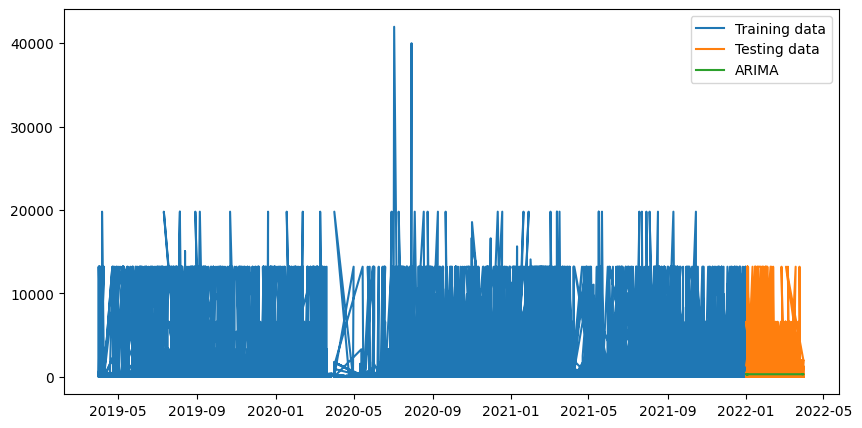

In [94]:
# print('ARIMA:', accuracy_arima)
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['QuantityAbs'], label='Training data')
plt.plot(test.index, test['QuantityAbs'], label='Testing data')
plt.plot(test.index, y_pred_arima, label='ARIMA')
plt.legend()

In [ ]:
# Neural Network model
X_train_nn = np.array(train.drop(columns=['QuantityAbs']))
y_train_nn = np.array(train['QuantityAbs'])
X_test_nn = np.array(test.drop(columns=['QuantityAbs']))
y_test_nn = np.array(test['QuantityAbs'])

model_nn = Sequential()
model_nn.add(Dense(5, input_dim=X_train_nn.shape[1], activation='relu'))
model_nn.add(Dense(1, activation='linear'))
model_nn.compile(loss='mean_squared_error', optimizer='adam')
model_nn.fit(X_train_nn, y_train_nn, epochs=100, batch_size=32, verbose=0)
y_pred_nn = model_nn.predict(X_test_nn).flatten()
accuracy_nn = calculate_accuracy(y_test_nn, y_pred_nn)

398/398 [==============================] - 1s 2ms/step


In [ ]:
model_nn.evaluate(X_test_nn,y_test_nn)

398/398 [==============================] - 1s 2ms/step - loss: 99099.1172


99099.1171875

In [ ]:
from croston import croston
y_pred_croston = croston(train, forecast_len=len(test))

In [120]:
# # Plot the actual vs predicted values for each model
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 5))
# plt.plot(train.index, train['QuantityAbs'], label='Training data')
# plt.plot(test.index, test['QuantityAbs'], label='Testing data')
# plt.plot(test.index, y_pred_arima, label='ARIMA')
# plt.plot(test.index, y_pred_nn, label='Neural Network')
# plt.plot(test.index, y_pred_croston, label='Croston')
# plt.legend()
# plt.title('Actual vs Predicted Values')
# plt.xlabel('Date')
# plt.ylabel('Quantity')
# plt.show()

# accuracy_arima = calculate_accuracy(test, y_pred_arima)
# accuracy_croston = calculate_accuracy(test, y_pred_croston)
# # Print the accuracy metrics for each model
# print('ARIMA:', accuracy_arima)
# print('Neural Network:', accuracy_nn)
# print('Croston:', accuracy_croston)